# Pymaceuticals Inc.
---

### Analysis
249 mice identified with SCC tumors were treated over 45 days with a range of treatments including target drug the company was interested in, Capomulin. One test subjects’ data was removed entirely as it was not possible to determine which of the data points were valid within the duplicates present. This left 248 test subjects.
- 1. Based on this set of data, Capomulin is the most effective drug for reducing average tumor size in mice.  A close second would be Ramicane.
- 2. There is a positive correlation (0.84) between mouse weight and tumor weight, the tumors are gaining weight along with the mice. More research would need to be done to understand what this correlation means. The composition of the tumors and the tumor growth factors would need to be understood. However, based on the data we have here we can say that mouse weight and tumor weight are positively correlated.
- 3. The least effective drugs were Infubanol and Ceftamin.

 

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df=pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [116]:
# Checking the number of mice
#mouse_study_df.nunique()
m_count=len(mouse_study_df['Mouse ID'].unique())
m_count

249

In [117]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=mouse_study_df.loc[mouse_study_df.duplicated(['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [118]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse= mouse_study_df.loc[mouse_study_df['Mouse ID']=='g989',:]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df=mouse_study_df[mouse_study_df['Mouse ID']!='g989']
clean_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [120]:
# Checking the number of mice in the clean DataFrame.
m_count=len(clean_mouse_study_df['Mouse ID'].unique())
m_count

248

## Summary Statistics

In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


# Assemble the resulting series into a single summary DataFrame.
summary_stat_1 = clean_mouse_study_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

summary_stat_1.columns = [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std Err."
]

summary_stat_1




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [122]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html
summary_stat_2 = clean_mouse_study_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
summary_stat_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

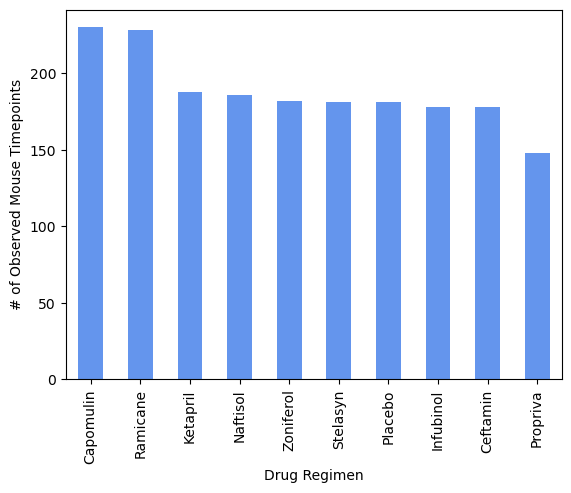

In [123]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ID_Time = clean_mouse_study_df["Drug Regimen"].value_counts()

df=ID_Time.to_frame().reset_index()
df.columns=['Drug Regimen','# of Observed Mouse Timepoints']
ax = df.plot(x="Drug Regimen", kind="bar", color='cornflowerblue', legend=False)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

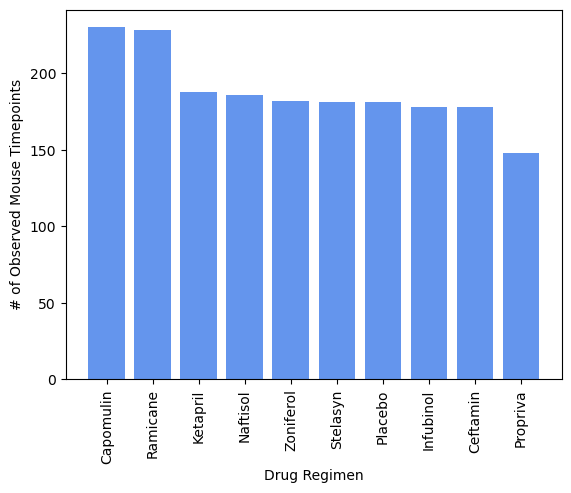

In [124]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

ID_Time = clean_mouse_study_df['Drug Regimen'].value_counts()

x_axis = range(len(ID_Time))

plt.bar(x_axis, ID_Time, color='cornflowerblue', align="center")

plt.xticks(x_axis, ID_Time.index, rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


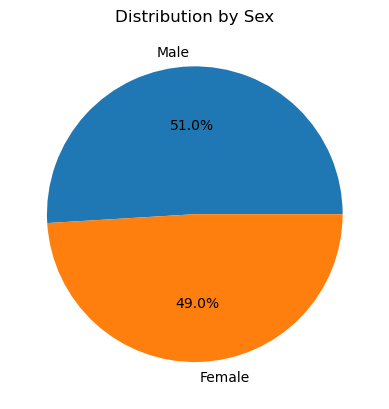

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_mouse_study_df["Sex"].value_counts()

size = mice_gender
gender_labels = ['Male','Female']
type(mice_gender)

mice_gender.plot.pie(labels=gender_labels, autopct='%1.1f%%', title='Distribution by Sex', ylabel='')
plt.show()


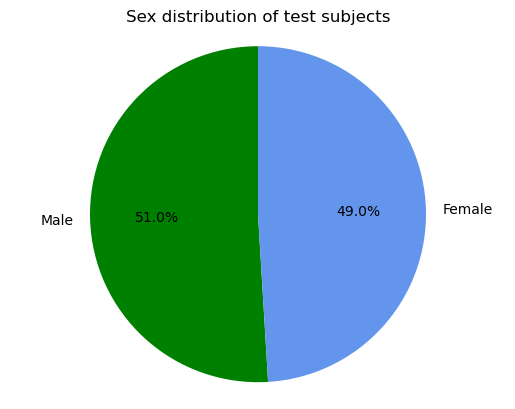

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
custom_colors=['green','cornflowerblue']
gender_labels = ['Male','Female']
plt.pie(gender, labels=gender_labels, autopct="%1.1f%%", explode=(0, 0), shadow=False, startangle=90,colors=custom_colors)
plt.title("Sex distribution of test subjects")
plt.axis('equal') 
plt.show()

## Quartiles, Outliers and Boxplots

In [127]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_per_mouse_df = clean_mouse_study_df.groupby(["Mouse ID"])["Timepoint"].max()
last_per_mouse_df = last_per_mouse_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merge_df=last_per_mouse_df.merge(clean_mouse_study_df,on=["Mouse ID","Timepoint"],how='left')
final_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [128]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treat_values=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
  
def calculate_and_print_outliers(regimen):
    regimen_data = final_merge_df.loc[final_merge_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25, .5, .75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
    # Determine outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")
    return regimen_data

for regimen in treatments:
    calculate_and_print_outliers(regimen)
        # Get the tumor volume data for the current regimen
    regimen_data = final_merge_df.loc[final_merge_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    # Append the data to the treat_values list
    treat_values.append(regimen_data)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


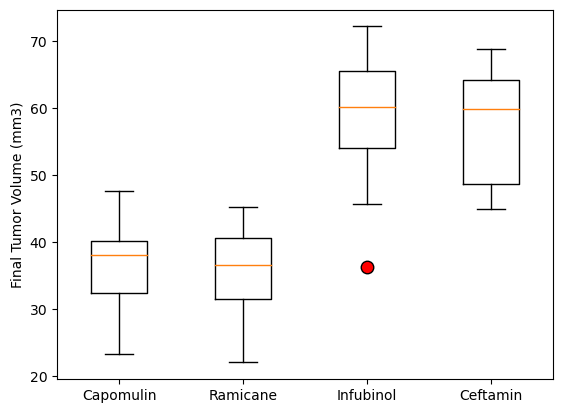

In [129]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_point = dict(markerfacecolor = "red", markersize=9)

plt.boxplot(treat_values,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_point)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

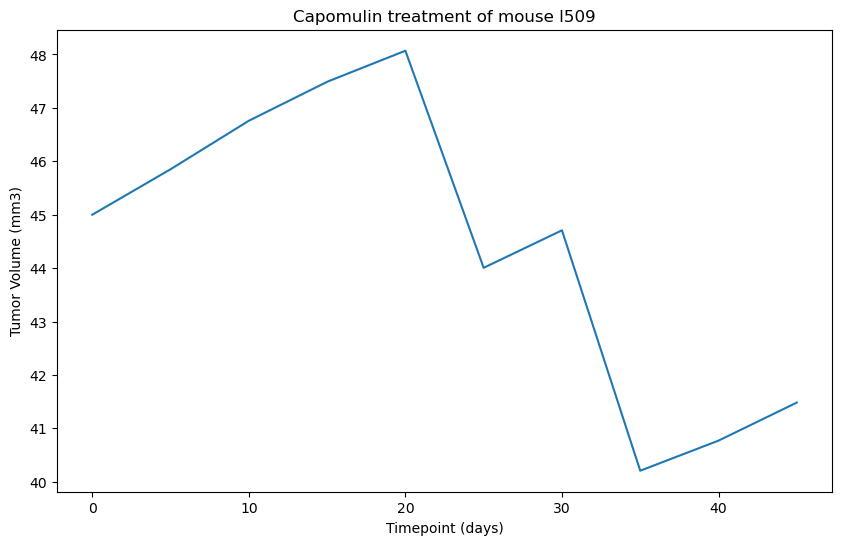

In [130]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
capomulin_data = clean_mouse_study_df[clean_mouse_study_df["Mouse ID"] == mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

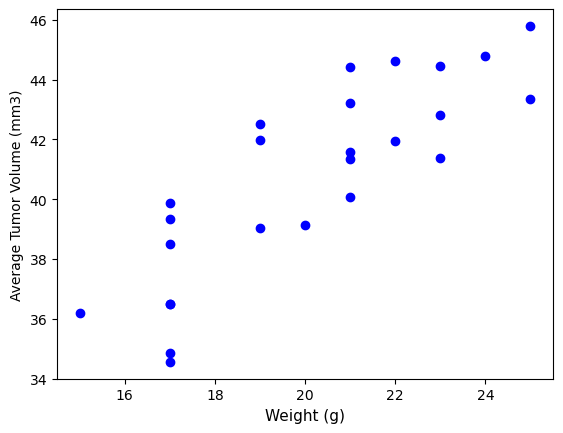

In [131]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin = clean_mouse_study_df[clean_mouse_study_df["Drug Regimen"] == 'Capomulin']

avg_capm_vol = capomulin.groupby(['Mouse ID'])[['Tumor Volume (mm3)', 'Weight (g)']].mean()

marker_size = 10
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)', fontsize=11)
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [132]:
avg_capm_vol.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0


The correlation between mouse weight and the average tumor volume is 0.84


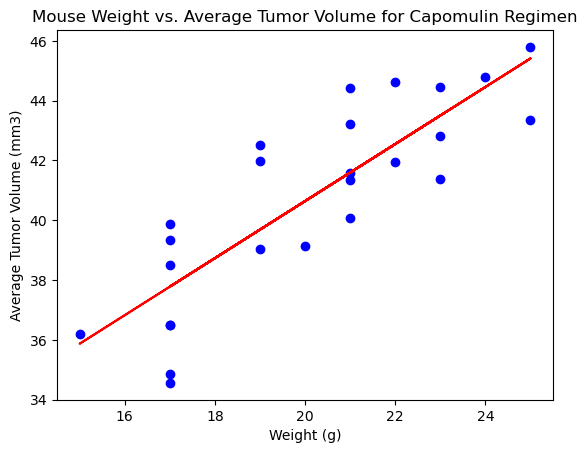

In [133]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")
x_axis = avg_capm_vol['Weight (g)']
y_axis = avg_capm_vol['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()